Monte-Carlo Controller

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from env import draw_card, step, get_action, cards
from matplotlib import cm
from tqdm import trange
from datetime import datetime
import os

On Policy Monte Carlo

In [30]:
Q = np.zeros((21, 10, 2))
N = np.zeros((21, 10, 2))

In [21]:
def MC(ep):
    global Q
    global N
    n0 = 100
    for j in trange(ep):
        ep_s = []
        ep_a = []
        ep_r = []

        curr = (np.random.choice(cards), np.random.choice(cards))
        t = 0
        
        while t == 0:
            act = get_action(curr[1] - 1, curr[0] - 1, n0, Q, N)
            ep_s.append(curr)
            ep_a.append(act)
            curr, rew, t = step(curr, act)
            ep_r.append(rew)

        for i in range(-1, -1*len(ep_s) - 1, -1):
            curr = ep_s[i]
            act = ep_a[i]
            N[curr[1]-1][curr[0] -1][act] += 1
            a = 1/(N[curr[1]-1][curr[0] -1][act])
            Q[curr[1]-1][curr[0] -1][act] += a*(ep_r[-1] - Q[curr[1]-1][curr[0] -1][act])

In [22]:
n = 10_00_000
MC(n)

100%|█████████████████████████████████████████████| 1000000/1000000 [00:23<00:00, 42824.50it/s]


In [23]:
name = f"MC_Results {datetime.now()}"
os.mkdir(name)
os.chdir(name)

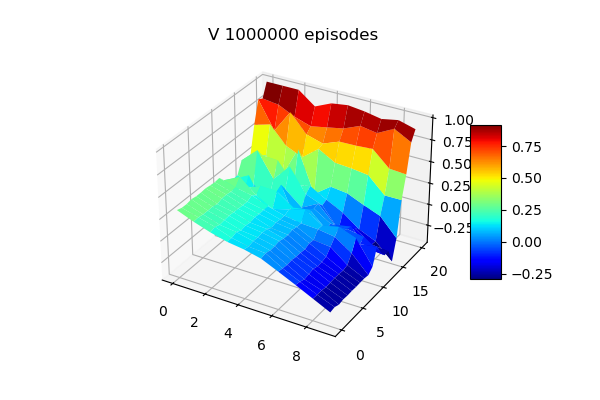

In [24]:
%matplotlib ipympl
V = np.zeros((21, 10))
for j in range(21):
    for i in range(10):
        V[j][i] = np.max(Q[j][i])
X, Y = np.meshgrid(range(10), range(21))
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection = '3d')
surf = ax.plot_surface(X, Y, V, cmap=cm.jet, linewidth=0.1)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title(f"V {n} episodes")
plt.savefig(f"MC V {n} episodes")
plt.show()

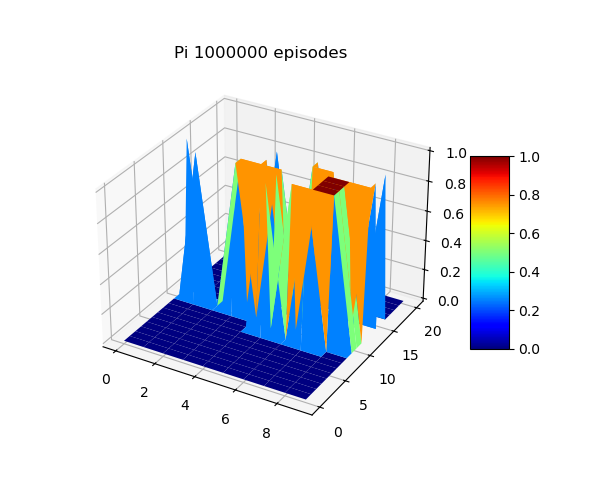

In [25]:
V = np.zeros((21, 10))
for j in range(21):
    for i in range(10):
        V[j][i] = np.argmax(Q[j][i])
X, Y = np.meshgrid(range(10), range(21))
fig = plt.figure(figsize=(6,5))
ax = plt.axes(projection = '3d')
surf = ax.plot_surface(X, Y, V, cmap=cm.jet, linewidth=0.1)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title(f"Pi {n} episodes")
plt.savefig(f"MC Pi {n} episodes")
plt.show()

In [26]:
wins = 0
for i in range(1_00_000):
    n0 = 100
    curr = (np.random.choice(cards), np.random.choice(cards))
    act = get_action(curr[1] - 1, curr[0] - 1, n0, Q, N)
    curr, rew, t = step(curr, act)
    while t == 0:
        act = get_action(curr[1] - 1, curr[0] - 1, n0, Q, N)
        curr, rew, t = step(curr, act)
    if rew >= 0:
        wins += 1
print(wins)

52725


In [27]:
np.save("Q_star_MC.npy", Q)

In [28]:
os.chdir("/home/guest/Desktop/Om/Stuff/Reinforce/")